In [ ]:
#!pip install tensorflow_datasets
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-datasetdog-cat-and-panda


In [ ]:
import shutil
import os

src_dir = path
dest_dir = "/content/my_dataset"

shutil.copytree(src_dir, dest_dir)

'/content/my_dataset'

In [ ]:
import os

files = os.listdir('my_dataset/images')
print(files)

['.ipynb_checkpoints', 'dogs', 'panda', 'cats']


In [ ]:
def gen_model():
  # Defines & compiles the model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting

      # The second convolution
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      keras.layers.Dropout(rate=0.1),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      keras.layers.Dropout(rate=0.10),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      # 3 output neuron for the 3 classes of Animal Images
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  from tensorflow.keras.optimizers import RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer="adam",
                metrics=['acc'])
  return model

In [ ]:
checkpoint_path = "my_dataset/images/.ipynb_checkpoints"
if os.path.exists(checkpoint_path):
    shutil.rmtree(checkpoint_path)
    print("Đã xóa thư mục .ipynb_checkpoints")

Đã xóa thư mục .ipynb_checkpoints


In [ ]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)

    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory(
        "my_dataset/animals/animals",    # Source directory
        target_size=(150, 150), # Resizes images
        batch_size=15,
        class_mode='categorical',
        subset = 'training')

    epochs = 2
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
        "my_dataset/animals/animals",
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='validation') # set as validation data

    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data = validation_generator,
        validation_steps = 50,
        verbose=1
    )

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 81s 526ms/step - acc: 0.4677 - loss: 1.3986 - val_acc: 0.6227 - val_loss: 0.8041
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 80s 534ms/step - acc: 0.6470 - loss: 0.6995 - val_acc: 0.6373 - val_loss: 0.7673


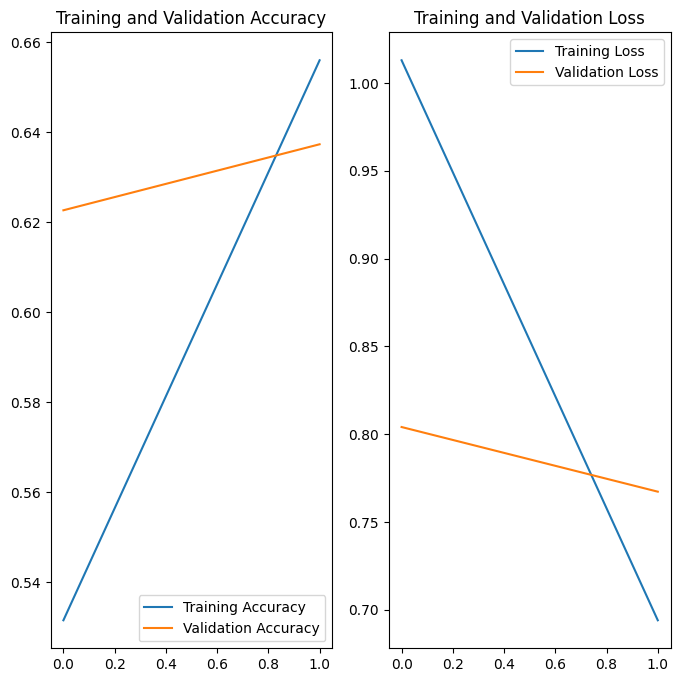

Training Accuracy:
0.656000018119812
Testing Accuracy:
0.637333333492279


In [ ]:
train_test_animals()

Đưa kích thước ảnh về 150x150 và chuyển thành vector

In [ ]:
import numpy as np
from PIL import Image
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

dir = 'my_dataset/animals/animals'

image_size = (150, 150)

def load_images_from_directory(directory):
    images = []
    labels = []
    label_map_local = {}
    label_counter_local = 0
    for label_name in os.listdir(directory):
        label_path = os.path.join(directory, label_name)
        if os.path.isdir(label_path):
            if label_name not in label_map_local:
                label_map_local[label_name] = label_counter_local
                label_counter_local += 1
            current_label = label_map_local[label_name]
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                try:
                    img = Image.open(image_path).convert('RGB').resize(image_size)
                    img_array = np.array(img).flatten()
                    images.append(img_array)
                    labels.append(current_label)
                except Exception as e:
                    print(f"Error whem process image: {image_path} - {e}")
    return np.array(images), np.array(labels)

X, y = load_images_from_directory(dir)




In [ ]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logR = LogisticRegression(multi_class='multinomial')
logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.532
Precision: 0.5384738466554366
Recall: 0.532


Dùng PCA giảm số chiều về 255. Sau đó sử dụng mô hình ANN để phân loại.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=255)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
from scipy import sparse

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def cost(Y, Yhat):
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(Yhat)) / m
    return loss

def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [ ]:
# Gradient Descent Loop
# To use this code easily, we put it to a method

def ANN_3layer_SolveClassification(X_train, Y_train, eta, max_count, num):
    X, Y = X_train, Y_train
    d, N = X_train.shape
    C = Y_train.shape[0]
    d1, d2 = num, C
    # make random data
    W1 = 0.01*np.random.randn(d, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    for i in range(max_count + 1):
        ## Feedforward
        Z1 = np.dot(W1.T, X) + b1
        A1 = ReLU(Z1)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)


        # print loss after each 10 iterations
        if i % 100 == 0:
            loss = cost(Y, Yhat)
            print("iter %d, loss: %f" %(i, loss))
            #print(i)
        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU
        dW1 = np.dot(X, E1.T)
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # Gradient Descent update
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2

    return W1, W2, b1, b2


def predict(W1, W2, b1, b2, images):
    Z1 = np.dot(W1.T, images) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    a = softmax(Z2)
    #return  np.argmax(Z2, axis=0) #
    return np.argmax(a, axis=0)

In [ ]:
Y_train = convert_labels(y_train, 3)

print(X_train_pca.T.shape)
print(Y_train.shape)

W1, W2, b1, b2 = ANN_3layer_SolveClassification(X_train_pca.T, Y_train, 1e-6,4000, num = 400)

(255, 2250)
(3, 2250)
iter 0, loss: 16.907769
iter 100, loss: 8.839891
iter 200, loss: 7.498804
iter 300, loss: 6.677316
iter 400, loss: 6.059699
iter 500, loss: 5.573177
iter 600, loss: 5.172920
iter 700, loss: 4.833923
iter 800, loss: 4.541716
iter 900, loss: 4.285997
iter 1000, loss: 4.057834
iter 1100, loss: 3.851881
iter 1200, loss: 3.665037
iter 1300, loss: 3.494272
iter 1400, loss: 3.337479
iter 1500, loss: 3.193049
iter 1600, loss: 3.059653
iter 1700, loss: 2.936072
iter 1800, loss: 2.821125
iter 1900, loss: 2.713480
iter 2000, loss: 2.612605
iter 2100, loss: 2.518251
iter 2200, loss: 2.429719
iter 2300, loss: 2.346631
iter 2400, loss: 2.268433
iter 2500, loss: 2.194511
iter 2600, loss: 2.124527
iter 2700, loss: 2.058088
iter 2800, loss: 1.994725
iter 2900, loss: 1.934389
iter 3000, loss: 1.876900
iter 3100, loss: 1.822080
iter 3200, loss: 1.769659
iter 3300, loss: 1.719566
iter 3400, loss: 1.671706
iter 3500, loss: 1.625968
iter 3600, loss: 1.582269
iter 3700, loss: 1.540424
i

In [ ]:
Y_pred_train = predict(W1, W2, b1, b2, X_train_pca.T)
print('accuracy training data: ', accuracy_score(y_train, Y_pred_train))

Y_test = convert_labels(y_test, 3)


Y_pred_val = predict(W1, W2, b1, b2, X_test_pca.T)
print(X_test_pca.T.shape, Y_pred_val.shape, 'accuracy validation data: ', accuracy_score(y_test, Y_pred_val))
print(y_test)
print(Y_pred_val)

accuracy training data:  0.7275555555555555
(255, 750) (750,) accuracy validation data:  0.492
[1 1 1 0 2 1 1 2 0 2 2 0 0 1 2 0 1 0 2 2 0 0 0 2 1 2 2 1 0 1 1 1 0 2 0 0 2
 0 0 1 0 0 0 0 1 1 2 0 2 1 1 2 0 2 0 2 1 0 2 1 0 0 0 0 0 1 1 1 1 0 1 2 2 1
 0 0 2 2 2 2 1 1 0 1 2 0 2 1 2 2 0 1 2 1 1 0 2 2 0 1 2 0 0 1 1 0 1 0 0 1 2
 0 2 2 0 2 0 0 1 1 2 1 0 1 1 2 1 0 0 0 2 1 1 1 0 0 0 1 1 2 2 1 2 2 2 0 2 2
 2 0 1 2 0 2 0 1 0 2 1 2 1 1 0 0 1 1 0 2 2 0 2 2 1 0 2 1 2 1 0 1 0 2 1 2 0
 0 0 2 1 1 0 1 1 0 1 2 0 2 0 0 1 1 0 2 1 1 2 2 0 2 2 1 1 2 0 0 0 0 1 2 1 1
 0 2 1 0 0 2 1 0 1 1 2 0 0 1 0 1 2 0 2 0 2 1 0 0 1 0 0 2 1 1 0 1 2 2 1 2 2
 2 1 1 0 1 0 2 2 2 2 0 1 1 2 0 1 1 2 1 0 0 1 0 0 0 0 1 0 2 0 0 2 2 1 1 1 2
 0 2 2 0 0 1 0 1 2 0 1 1 1 0 0 1 0 2 1 2 0 2 1 1 1 0 2 2 1 1 0 2 2 2 0 1 1
 1 1 2 2 1 2 1 2 0 1 2 0 1 2 0 1 0 1 2 0 2 2 0 2 0 2 1 2 2 1 0 0 0 1 1 1 2
 0 0 1 1 0 1 1 1 0 1 0 2 0 0 0 2 1 0 0 1 2 1 1 1 2 1 0 0 0 2 0 2 1 2 2 1 0
 2 0 2 1 0 1 0 0 1 1 0 1 0 0 2 1 1 0 0 0 0 0 0 2 0 2 1 1 1 1 1 2 0 0 1 2 1
 2 0 